In [1]:
import os
import numpy as np
import pandas as pd
from datetime import datetime
import time
import random

#from tqdm.autonotebook import tqdm
#from tqdm.notebook import tqdm
from tqdm import tqdm

#Torch
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
from torch.utils.data.sampler import SequentialSampler, RandomSampler

#sklearn
from sklearn.model_selection import StratifiedKFold

#CV
import cv2

In [2]:

from models.matcher import HungarianMatcher
from models.detr import SetCriterion, PostProcess

In [5]:
from util import box_ops
from engine import evaluate, train_one_epoch
from datasets.coco_eval import CocoEvaluator

In [3]:
# Albumenatations
import albumentations as A
import matplotlib.pyplot as plt
from albumentations.pytorch.transforms import ToTensorV2


In [6]:
# for plotting
from torchvision.ops.boxes import box_area
from util.plot_utils import plot_logs
from pathlib import Path

Try to plot performance metrics using:
- the log.txt document

from the latest version of the model
- on crops
- from July 1st
- on 100 epochs

In [15]:
#location of log.txt output file
outDir = "C:\\Users\\Eva.Locusteanu\\PycharmProjects\\detr\\outDir\\July1st"

In [11]:
from util.plot_utils import plot_logs
from pathlib import Path

log_directory = [Path(outDir)]
print(log_directory)

[WindowsPath('C:/Users/Eva.Locusteanu/PycharmProjects/detr/outDir/July1st')]


C:\Users\Eva.Locusteanu\Anaconda3\envs\pytorchenv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


AttributeError: 'DataFrame' object has no attribute 'test_coco_eval_bbox'

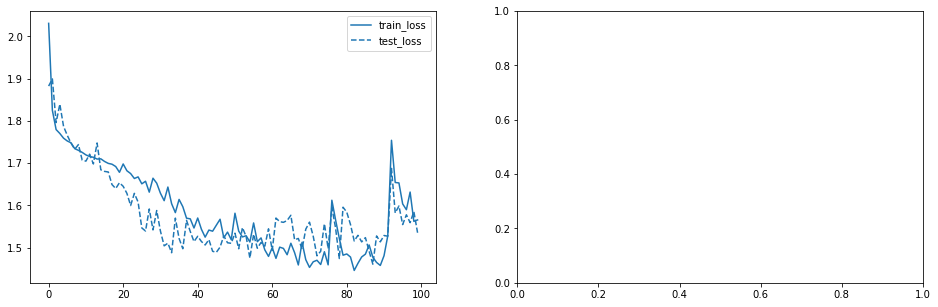

In [12]:
fields_of_interest = ("loss", "mAP",)
plot_logs(log_directory, fields_of_interest)

C:\Users\Eva.Locusteanu\Anaconda3\envs\pytorchenv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Eva.Locusteanu\Anaconda3\envs\pytorchenv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Eva.Locusteanu\Anaconda3\envs\pytorchenv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


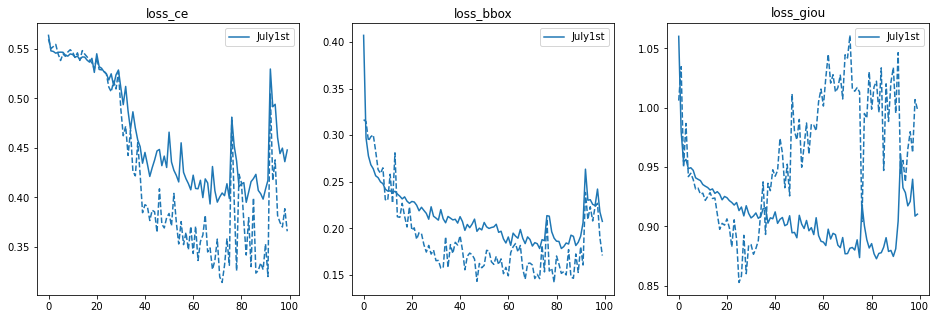

In [13]:
fields_of_interest= ('loss_ce', 'loss_bbox', 'loss_giou',)
plot_logs(log_directory, fields_of_interest)

C:\Users\Eva.Locusteanu\Anaconda3\envs\pytorchenv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Eva.Locusteanu\Anaconda3\envs\pytorchenv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


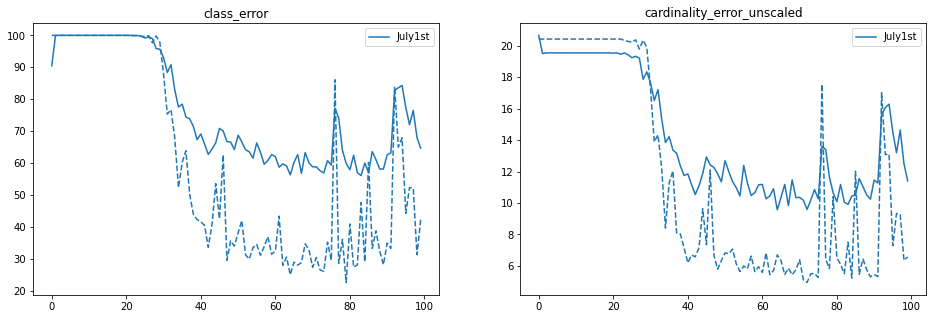

In [14]:
fields_of_interest = ('class_error', 'cardinality_error_unscaled', )
plot_logs(log_directory, fields_of_interest)